Загрузка библиотек:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Предупреждения от библиотеки sklearn вылетают практически всегда, будем их игнорировать:

In [5]:
import warnings 
warnings.filterwarnings('ignore') 

Загрузка набора данных:

In [6]:
from sklearn.datasets import load_boston
boston_data = load_boston()

Создание датафрейма Х:

In [8]:
X = pd.DataFrame(boston_data.data, columns = boston_data.feature_names )
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Создание датафрейма y:

In [9]:
y = pd.DataFrame(boston_data.target)
y.columns = ['y']
y.head()

,y
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


Разбиение этого датафрейма на тренировочную (X_train, y_train) и тестовую (X_test, y_test) выборки:

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 42)

Масштабирование данных с помощью StandardScaler:

In [13]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler() #инициализация модели 

Xtrain_ss = pd.DataFrame(ss.fit_transform(X_train), columns = boston_data.feature_names) #снова преобразуем в датасет
Xtest_ss = pd.DataFrame(ss.fit_transform(X_test), columns = boston_data.feature_names)

Построение модели TSNE на тренировочный данных:

In [14]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, learning_rate=250, random_state=42) #инициализация модели 
X_tsne = model.fit_transform(Xtrain_ss)

Построение диаграммы рассеяния на этих данных:

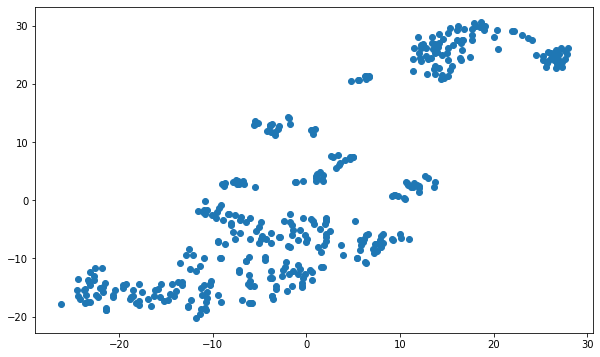

In [15]:
fig, ax = plt.subplots(figsize=(10, 6)) #размер изображения

ax.scatter(x = X_tsne[:, 0],  y = X_tsne[:, 1]) #данные

plt.show()

# Задание 2

С помощью KMeans разбиваем данные из тренировочного набора на 3 кластера:

In [16]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
kmeans_on_train = kmeans.fit_predict(Xtrain_ss)

Диаграмма рассеивания:

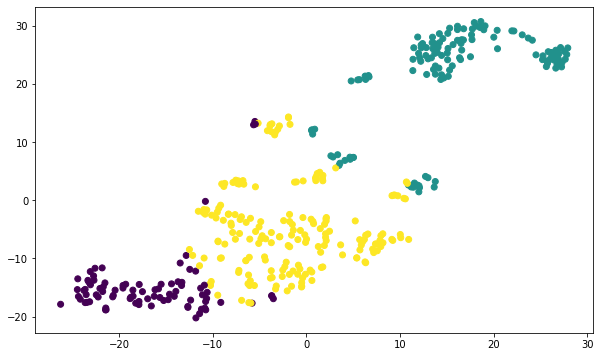

In [17]:
fig, ax = plt.subplots(figsize=(10, 6)) #размер изображения

ax.scatter(x = X_tsne[:, 0],  y = X_tsne[:, 1], c=kmeans_on_train) #данные

plt.show()

Средние значения целевой переменной price покластерно:

In [23]:
y_train.groupby(kmeans_on_train).agg('mean')

,y
0,27.788372
1,16.165354
2,24.958115


Средние значения переменной CRIM покластерно:

In [24]:
X_train['CRIM'].groupby(kmeans_on_train).agg('mean')

0     0.073566
1    10.797028
2     0.421660
Name: CRIM, dtype: float64

# Задание 3

Применение модели KMeans к тестовым данным:

In [29]:
kmeans_on_test = kmeans.predict(Xtest_ss)

Средние значения целевой переменной price покластерно на тестовых данных:

In [30]:
y_test.groupby(kmeans_on_test).agg('mean')

,y
0,28.413636
1,16.437143
2,22.031111


Средние значения переменной CRIM покластерно на тестовых данных:

In [31]:
X_test['CRIM'].groupby(kmeans_on_test).agg('mean')

0     0.079852
1    10.165531
2     0.284583
Name: CRIM, dtype: float64